In [1]:
import os
import numpy as np
import pandas as pd
import efficientnet.tfkeras
from tensorflow.keras.models import load_model

2023-04-12 15:38:23.099919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 15:38:23.169933: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-12 15:38:23.507713: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/kannika/miniconda3/envs/vit-tf/lib/
2023-04-12 15:38:23.507751: W tensorflow/compiler/xla/s

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

## R2 : Unfreeze

In [3]:
## Set Model path
model_dir ='/media/data/ModelEffNet/Regression/Exp-2-resume/R2/models/modelRegress_EffNetB7_Rheology_R2.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]
print(f"height: {height}, width: {width} ")

2023-04-12 15:39:10.100837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 15:39:10.104265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 15:39:10.104692: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 15:39:10.105265: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

height: 600, width: 600 


In [5]:
model.summary()

Model: "EffNet_Regression"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 300, 300, 64  1728        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 300, 300, 64  256         ['stem_conv[0][0]']              
                                )                                                 

                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 32)          0           ['block1c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block1c_se_reshape (Reshape)   (None, 1, 1, 32)     0           ['block1c_se_squeeze[0][0]']     
                                                                                                  
 block1c_se_reduce (Conv2D)     (None, 1, 1, 8)      264         ['block1c_se_reshape[0][0]']     
                                                                                                  
 block1c_se_expand (Conv2D)     (None, 1, 1, 32)     288         ['block1c_se_reduce[0][0]']      
                                                                                                  
 block1c_s

 block2a_se_expand (Conv2D)     (None, 1, 1, 192)    1728        ['block2a_se_reduce[0][0]']      
                                                                                                  
 block2a_se_excite (Multiply)   (None, 150, 150, 19  0           ['block2a_activation[0][0]',     
                                2)                                'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, 150, 150, 48  9216        ['block2a_se_excite[0][0]']      
                                )                                                                 
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 150, 150, 48  192        ['block2a_project_conv[0][0]']   
 lization)                      )                                                                 
          

 block2c_project_conv (Conv2D)  (None, 150, 150, 48  13824       ['block2c_se_excite[0][0]']      
                                )                                                                 
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 150, 150, 48  192        ['block2c_project_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 block2c_drop (FixedDropout)    (None, 150, 150, 48  0           ['block2c_project_bn[0][0]']     
                                )                                                                 
                                                                                                  
 block2c_add (Add)              (None, 150, 150, 48  0           ['block2c_drop[0][0]',           
          

                                                                                                  
 block2e_project_conv (Conv2D)  (None, 150, 150, 48  13824       ['block2e_se_excite[0][0]']      
                                )                                                                 
                                                                                                  
 block2e_project_bn (BatchNorma  (None, 150, 150, 48  192        ['block2e_project_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 block2e_drop (FixedDropout)    (None, 150, 150, 48  0           ['block2e_project_bn[0][0]']     
                                )                                                                 
                                                                                                  
 block2e_a

                                8)                                'block2g_se_expand[0][0]']      
                                                                                                  
 block2g_project_conv (Conv2D)  (None, 150, 150, 48  13824       ['block2g_se_excite[0][0]']      
                                )                                                                 
                                                                                                  
 block2g_project_bn (BatchNorma  (None, 150, 150, 48  192        ['block2g_project_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 block2g_drop (FixedDropout)    (None, 150, 150, 48  0           ['block2g_project_bn[0][0]']     
                                )                                                                 
          

 block3b_drop (FixedDropout)    (None, 75, 75, 80)   0           ['block3b_project_bn[0][0]']     
                                                                                                  
 block3b_add (Add)              (None, 75, 75, 80)   0           ['block3b_drop[0][0]',           
                                                                  'block3a_project_bn[0][0]']     
                                                                                                  
 block3c_expand_conv (Conv2D)   (None, 75, 75, 480)  38400       ['block3b_add[0][0]']            
                                                                                                  
 block3c_expand_bn (BatchNormal  (None, 75, 75, 480)  1920       ['block3c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3c_e

 block3e_expand_conv (Conv2D)   (None, 75, 75, 480)  38400       ['block3d_add[0][0]']            
                                                                                                  
 block3e_expand_bn (BatchNormal  (None, 75, 75, 480)  1920       ['block3e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3e_expand_activation (Act  (None, 75, 75, 480)  0          ['block3e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3e_dwconv (DepthwiseConv2  (None, 75, 75, 480)  12000      ['block3e_expand_activation[0][0]
 D)                                                              ']                               
          

 block3g_expand_activation (Act  (None, 75, 75, 480)  0          ['block3g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3g_dwconv (DepthwiseConv2  (None, 75, 75, 480)  12000      ['block3g_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3g_bn (BatchNormalization  (None, 75, 75, 480)  1920       ['block3g_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3g_activation (Activation  (None, 75, 75, 480)  0          ['block3g_bn[0][0]']             
 )        

 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 960)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block4b_se_reduce[0][0]']      
          

 block4d_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4d_se_squeeze[0][0]']     
                                                                                                  
 block4d_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block4d_se_reshape[0][0]']     
                                                                                                  
 block4d_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block4d_se_reduce[0][0]']      
                                                                                                  
 block4d_se_excite (Multiply)   (None, 38, 38, 960)  0           ['block4d_activation[0][0]',     
                                                                  'block4d_se_expand[0][0]']      
                                                                                                  
 block4d_project_conv (Conv2D)  (None, 38, 38, 160)  153600      ['block4d_se_excite[0][0]']      
          

                                                                                                  
 block4f_se_excite (Multiply)   (None, 38, 38, 960)  0           ['block4f_activation[0][0]',     
                                                                  'block4f_se_expand[0][0]']      
                                                                                                  
 block4f_project_conv (Conv2D)  (None, 38, 38, 160)  153600      ['block4f_se_excite[0][0]']      
                                                                                                  
 block4f_project_bn (BatchNorma  (None, 38, 38, 160)  640        ['block4f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4f_drop (FixedDropout)    (None, 38, 38, 160)  0           ['block4f_project_bn[0][0]']     
          

                                                                                                  
 block4h_project_bn (BatchNorma  (None, 38, 38, 160)  640        ['block4h_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4h_drop (FixedDropout)    (None, 38, 38, 160)  0           ['block4h_project_bn[0][0]']     
                                                                                                  
 block4h_add (Add)              (None, 38, 38, 160)  0           ['block4h_drop[0][0]',           
                                                                  'block4g_add[0][0]']            
                                                                                                  
 block4i_expand_conv (Conv2D)   (None, 38, 38, 960)  153600      ['block4h_add[0][0]']            
          

                                                                                                  
 block4j_add (Add)              (None, 38, 38, 160)  0           ['block4j_drop[0][0]',           
                                                                  'block4i_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, 38, 38, 960)  153600      ['block4j_add[0][0]']            
                                                                                                  
 block5a_expand_bn (BatchNormal  (None, 38, 38, 960)  3840       ['block5a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5a_expand_activation (Act  (None, 38, 38, 960)  0          ['block5a_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block5c_expand_activation (Act  (None, 38, 38, 1344  0          ['block5c_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5c_dwconv (DepthwiseConv2  (None, 38, 38, 1344  33600      ['block5c_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block5c_bn (BatchNormalization  (None, 38, 38, 1344  5376       ['block5c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block5c_a

                                                                                                  
 block5e_dwconv (DepthwiseConv2  (None, 38, 38, 1344  33600      ['block5e_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block5e_bn (BatchNormalization  (None, 38, 38, 1344  5376       ['block5e_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block5e_activation (Activation  (None, 38, 38, 1344  0          ['block5e_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5e_s

                                                                                                  
 block5g_bn (BatchNormalization  (None, 38, 38, 1344  5376       ['block5g_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block5g_activation (Activation  (None, 38, 38, 1344  0          ['block5g_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5g_se_squeeze (GlobalAver  (None, 1344)        0           ['block5g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5g_s

                                                                                                  
 block5i_activation (Activation  (None, 38, 38, 1344  0          ['block5i_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5i_se_squeeze (GlobalAver  (None, 1344)        0           ['block5i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5i_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5i_se_squeeze[0][0]']     
                                                                                                  
 block5i_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5i_se_reshape[0][0]']     
          

                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 1344)        0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_s

 block6c_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6c_se_reduce[0][0]']      
                                                                                                  
 block6c_se_excite (Multiply)   (None, 19, 19, 2304  0           ['block6c_activation[0][0]',     
                                )                                 'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 19, 19, 384)  884736      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 19, 19, 384)  1536       ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_d

                                )                                 'block6e_se_expand[0][0]']      
                                                                                                  
 block6e_project_conv (Conv2D)  (None, 19, 19, 384)  884736      ['block6e_se_excite[0][0]']      
                                                                                                  
 block6e_project_bn (BatchNorma  (None, 19, 19, 384)  1536       ['block6e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6e_drop (FixedDropout)    (None, 19, 19, 384)  0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 19, 19, 384)  0           ['block6e_drop[0][0]',           
          

                                                                                                  
 block6g_project_bn (BatchNorma  (None, 19, 19, 384)  1536       ['block6g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6g_drop (FixedDropout)    (None, 19, 19, 384)  0           ['block6g_project_bn[0][0]']     
                                                                                                  
 block6g_add (Add)              (None, 19, 19, 384)  0           ['block6g_drop[0][0]',           
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 19, 19, 2304  884736      ['block6g_add[0][0]']            
          

                                                                                                  
 block6i_drop (FixedDropout)    (None, 19, 19, 384)  0           ['block6i_project_bn[0][0]']     
                                                                                                  
 block6i_add (Add)              (None, 19, 19, 384)  0           ['block6i_drop[0][0]',           
                                                                  'block6h_add[0][0]']            
                                                                                                  
 block6j_expand_conv (Conv2D)   (None, 19, 19, 2304  884736      ['block6i_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6j_expand_bn (BatchNormal  (None, 19, 19, 2304  9216       ['block6j_expand_conv[0][0]']    
 ization) 

 block6k_add (Add)              (None, 19, 19, 384)  0           ['block6k_drop[0][0]',           
                                                                  'block6j_add[0][0]']            
                                                                                                  
 block6l_expand_conv (Conv2D)   (None, 19, 19, 2304  884736      ['block6k_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6l_expand_bn (BatchNormal  (None, 19, 19, 2304  9216       ['block6l_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6l_expand_activation (Act  (None, 19, 19, 2304  0          ['block6l_expand_bn[0][0]']      
 ivation) 

 block7a_expand_conv (Conv2D)   (None, 19, 19, 2304  884736      ['block6m_add[0][0]']            
                                )                                                                 
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 19, 19, 2304  9216       ['block7a_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block7a_expand_activation (Act  (None, 19, 19, 2304  0          ['block7a_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 19, 19, 2304  20736      ['block7a_expand_activation[0][0]
 D)       

                                                                                                  
 block7c_dwconv (DepthwiseConv2  (None, 19, 19, 3840  34560      ['block7c_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block7c_bn (BatchNormalization  (None, 19, 19, 3840  15360      ['block7c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block7c_activation (Activation  (None, 19, 19, 3840  0          ['block7c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block7c_s

                                                                                                  
 batchNormalization (BatchNorma  (None, 2560)        10240       ['head_pooling[0][0]']           
 lization)                                                                                        
                                                                                                  
 head_dropout (Dropout)         (None, 2560)         0           ['batchNormalization[0][0]']     
                                                                                                  
 pred_dense_1 (Dense)           (None, 64)           163904      ['head_dropout[0][0]']           
                                                                                                  
 pred_dense_2 (Dense)           (None, 32)           2080        ['pred_dense_1[0][0]']           
                                                                                                  
 predictio

## Evaluation model

In [6]:
###** Test set

dataframe = pd.read_csv('/home/kannika/CSV/MSDT_datatest.csv')
print(dataframe.shape)
dataframe.head(5)

(870, 9)


,Unnamed: 0.1,Unnamed: 0,GLY,folderName,fileName,pathimg,idt,MSDT,subset
0,0,0,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,158,5.63,test
1,1,1,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,25,0.84,test
2,2,2,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,7,0.25,test
3,3,3,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,125,4.45,test
4,4,4,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,19,0.63,test


In [7]:
BATCH_SIZE = 16

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

valid_datagen = ImageDataGenerator(rescale=1./255)

val_generator = valid_datagen.flow_from_dataframe(
                dataframe = dataframe,
                directory = None,
                x_col = 'pathimg',
                y_col = 'MSDT',
                target_size = (height, width),
                batch_size=BATCH_SIZE,
                color_mode= 'rgb',
                class_mode='raw')

Found 870 validated image filenames.


In [9]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

#Predict
pred_list = list()
#prob_list = list()
img_path=dataframe['pathimg'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    pred_list.append(predict[0])
    print(predict)

2023-04-12 15:39:48.532635: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-04-12 15:39:48.821481: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-12 15:39:48.821909: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-12 15:39:48.821924: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-04-12 15:39:48.822310: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-12 15:39:48.822350: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 4s 4s/step
[8.320711]
1/1 [==============================] - 0s 33ms/step
[0.61771727]
1/1 [==============================] - 0s 33ms/step
[0.61767054]
1/1 [==============================] - 0s 34ms/step
[7.3066983]
1/1 [==============================] - 0s 33ms/step
[0.61767054]
1/1 [==============================] - 0s 33ms/step
[2.677319]
1/1 [==============================] - 0s 33ms/step
[17.60686]
1/1 [==============================] - 0s 33ms/step
[17.606857]
1/1 [==============================] - 0s 33ms/step
[17.60686]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[17.606857]
1/1 [==============================] - 0s 32ms/step
[2.971439]
1/1 [==============================] - 0s 33ms/step
[12.393883]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61840343]
1/1 [==============================] - 0s

1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[10.59181]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[8.195744]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 33ms/step
[13.381687]
1/1 [==============================] - 0s 32ms/step
[6.1246357]
1/1 [==============================] - 0s 32ms/step
[17.606857]
1/1 [==============================] - 0s 32ms/step
[2.7900662]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[17.60686]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 33ms/step
[0.61767054]
1/1 [==============================

1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[6.7499213]
1/1 [==============================] - 0s 31ms/step
[10.267605]
1/1 [==============================] - 0s 33ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 33ms/step
[5.303812]
1/1 [==============================] - 0s 33ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[1.703619]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[17.60686]
1/1 [==============================] - 0s 33ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[17.60686]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================

1/1 [==============================] - 0s 32ms/step
[17.60686]
1/1 [==============================] - 0s 33ms/step
[4.926562]
1/1 [==============================] - 0s 33ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[17.606855]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[17.60686]
1/1 [==============================] - 0s 32ms/step
[10.123411]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[17.60686]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================

1/1 [==============================] - 0s 33ms/step
[2.658833]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[2.6702633]
1/1 [==============================] - 0s 32ms/step
[14.074055]
1/1 [==============================] - 0s 32ms/step
[5.4041476]
1/1 [==============================] - 0s 31ms/step
[0.6176815]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 33ms/step
[0.6179228]
1/1 [==============================] - 0s 32ms/step
[17.60686]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[2.745789]
1/1 [==============================]

1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[2.2825227]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 31ms/step
[0.61767054]
1/1 [==============================] - 0s 33ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[3.0985193]
1/1 [==============================] - 0s 32ms/step
[2.6539989]
1/1 [==============================] - 0s 32ms/step
[7.2859735]
1/1 [==============================] - 0s 32ms/step
[5.8896475]
1/1 [=========================

[1.2751541]
1/1 [==============================] - 0s 32ms/step
[0.6176791]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 33ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767673]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 32ms/step
[0.61767054]
1/1 [==============================] - 0s 31ms/step
[0.61767054]
1/1 [=========

In [10]:
print(len(pred_list))

dataframe['pre_MSDT'] = pred_list
dataframe.head(3)

870


,Unnamed: 0.1,Unnamed: 0,GLY,folderName,fileName,pathimg,idt,MSDT,subset,pre_MSDT
0,0,0,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,158,5.63,test,8.320711
1,1,1,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,25,0.84,test,0.617717
2,2,2,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,7,0.25,test,0.617671


In [11]:
dataframe.to_csv('/home/kannika/CSV/MSDT_test_modelRegressEffNet_B7_Rheology_R2.csv')

In [12]:
#pred_list

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


y_test = dataframe['MSDT'].tolist()
# The mean squared error
print("Root Mean squared error: %.4f" % mean_squared_error(y_test, pred_list, squared=False))
print("Mean squared error: %.4f" % mean_squared_error(y_test, pred_list))
print("Mean absolute error: %.4f" % mean_absolute_error(y_test, pred_list))


# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, pred_list))

Root Mean squared error: 4.8067
Mean squared error: 23.1044
Mean absolute error: 1.8735
Coefficient of determination: 0.7042


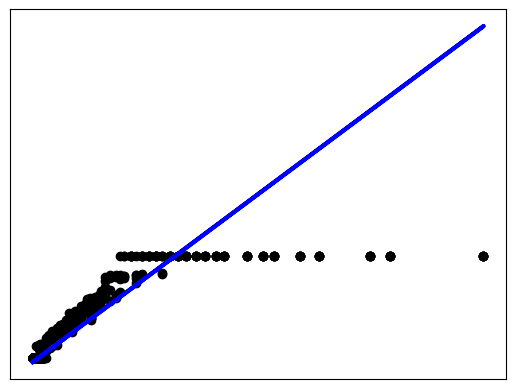

In [14]:
# Plot outputs
plt.scatter(y_test, pred_list, color="black")
plt.plot(y_test, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Plot : GLY2 10, 20,30,40,60,80

> ## t & msd unit

(29, 3)
---[INFO]--- Random Folder ==> GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912
(29, 10)
========== Predict MSDT จาก Glycerol ความเข้มข้น GLY10% ==========
Root Mean squared error: 9.6204
Mean squared error: 92.5516
Mean absolute error: 4.3535
Coefficient of determination: 0.5480
--------------------------------------------------------------------------------


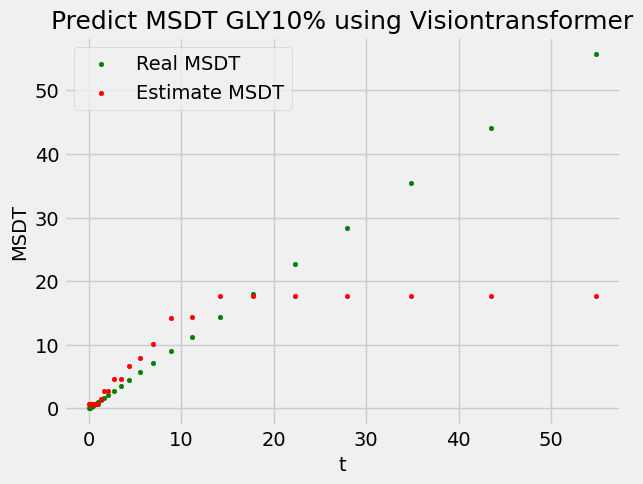

(29, 3)
---[INFO]--- Random Folder ==> GLY20P100_D0_30HZ_20XINF_UWELL_20221227_093937
(29, 10)
========== Predict MSDT จาก Glycerol ความเข้มข้น GLY20% ==========
Root Mean squared error: 5.7288
Mean squared error: 32.8190
Mean absolute error: 2.5940
Coefficient of determination: 0.7133
--------------------------------------------------------------------------------


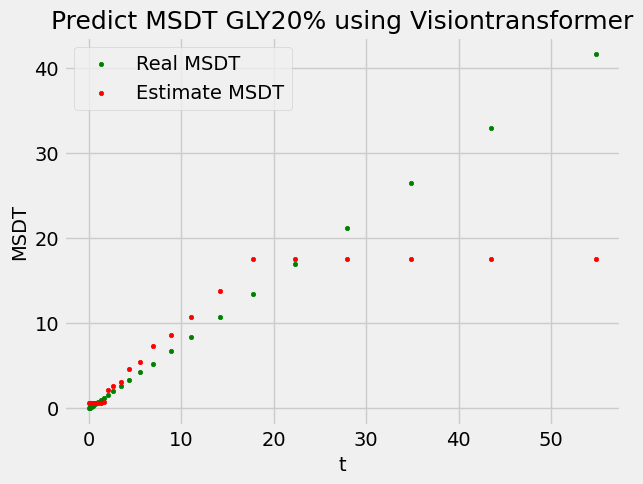

(29, 3)
---[INFO]--- Random Folder ==> GLY30P100_D0_30HZ_20XINF_UWELL_20221228_161452
(29, 10)
========== Predict MSDT จาก Glycerol ความเข้มข้น GLY30% ==========
Root Mean squared error: 2.8956
Mean squared error: 8.3843
Mean absolute error: 1.5871
Coefficient of determination: 0.8567
--------------------------------------------------------------------------------


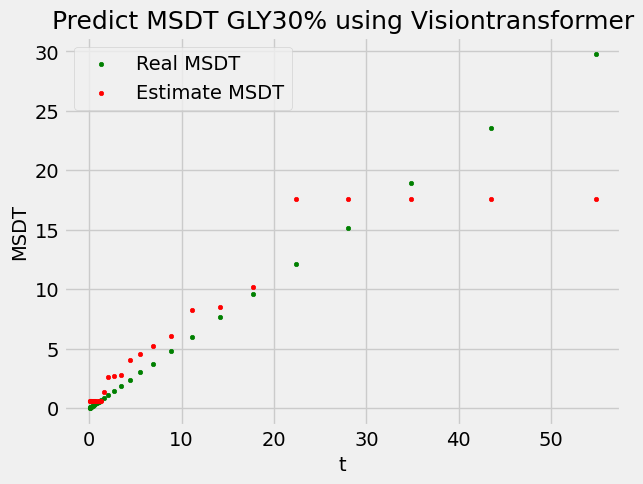

(29, 3)
---[INFO]--- Random Folder ==> GLY40P100_D0_30HZ_20XINF_UWELL_20221227_193632
(29, 10)
========== Predict MSDT จาก Glycerol ความเข้มข้น GLY40% ==========
Root Mean squared error: 1.9438
Mean squared error: 3.7784
Mean absolute error: 1.5500
Coefficient of determination: 0.8595
--------------------------------------------------------------------------------


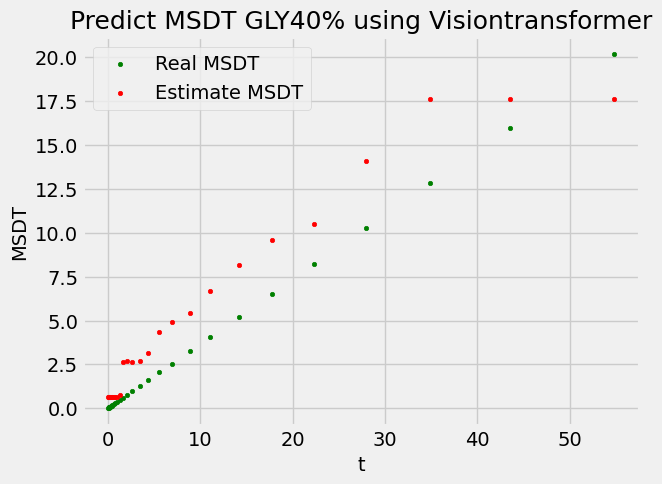

(29, 3)
---[INFO]--- Random Folder ==> GLY60P100_D0_30HZ_20XINF_UWELL_20221228_064454
(29, 10)
========== Predict MSDT จาก Glycerol ความเข้มข้น GLY60% ==========
Root Mean squared error: 1.0124
Mean squared error: 1.0250
Mean absolute error: 0.8063
Coefficient of determination: 0.7067
--------------------------------------------------------------------------------


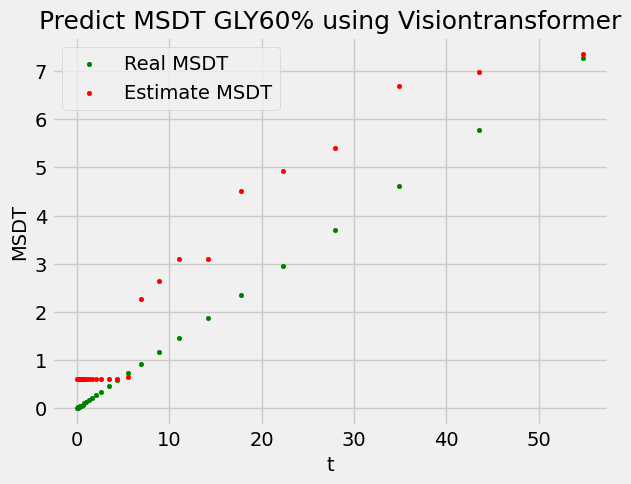

(29, 3)
---[INFO]--- Random Folder ==> GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540
(29, 10)
========== Predict MSDT จาก Glycerol ความเข้มข้น GLY80% ==========
Root Mean squared error: 0.5054
Mean squared error: 0.2555
Mean absolute error: 0.4745
Coefficient of determination: -0.9743
--------------------------------------------------------------------------------


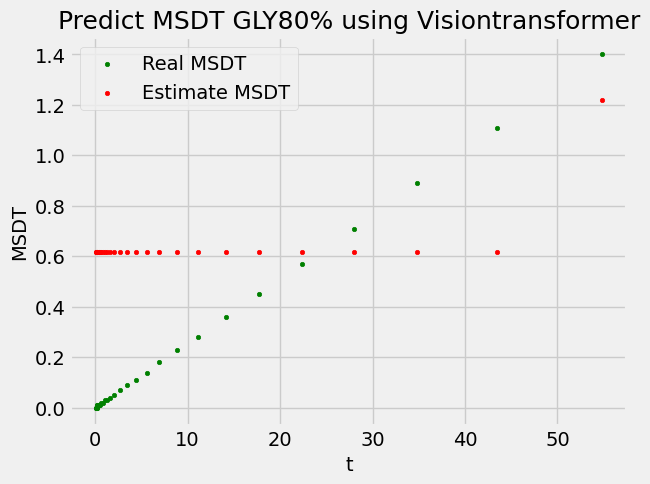

In [16]:
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

df_all_GLY = pd.read_csv("/home/kannika/CSV/df_all_GLY_test_modelRegress_ViT_l32_Rheology_R1.csv")
df_rand_ = []
GLY = [10, 20, 30, 40, 60, 80]
for G in GLY:
    _G = f"GLY{G}"
    df_idt = pd.read_csv(f'/home/kannika/CSV/MSDT_G{G}.csv')
    print(df_idt.shape)
    _GLY = dataframe[dataframe['GLY']==_G]
    base_GLY = df_all_GLY[df_all_GLY['GLY']==_G]
    setFolder = list(set(base_GLY['folderName']))
    rand_ = setFolder[0]
    df_rand = _GLY[_GLY['folderName']==rand_].reset_index(drop=True)
    print(f"---[INFO]--- Random Folder ==> {rand_}")
    print(df_rand.shape)
    df_rand = df_rand.sort_values(by=['idt'])
    list_t = df_idt['t'].tolist()
    df_rand['t'] = list_t
    df_rand_.append(df_rand)

    y_testGLY10 = df_rand['MSDT'].tolist()
    pred_listGLY10 = df_rand['pre_MSDT'].tolist()
    # The mean squared error
    print(f"========== Predict MSDT จาก Glycerol ความเข้มข้น {_G}% ==========")
    print("Root Mean squared error: %.4f" % mean_squared_error(y_testGLY10, pred_listGLY10, squared=False))
    print("Mean squared error: %.4f" % mean_squared_error(y_testGLY10, pred_listGLY10))
    print("Mean absolute error: %.4f" % mean_absolute_error(y_testGLY10, pred_listGLY10))

    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.4f" % r2_score(y_testGLY10, pred_listGLY10))
    print("-"*80)

    ## setting plot style
    
    plt.style.use('fivethirtyeight')

    ## plotting residual errors in training data
    plt.scatter(list_t, y_testGLY10,
                color = "green", s = 10, label = 'Real MSDT')
    ## plotting residual errors in test data
    plt.scatter(list_t, pred_listGLY10,
                color = "red", s = 10, label = 'Estimate MSDT')
    ## plotting line for zero residual error
    #plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
    ## plotting legend
    plt.legend(loc = 'upper left')
    ## plot title
    plt.title(f"Predict MSDT {_G}% using Visiontransformer", size=18)
    plt.xlabel("t", size=14)
    plt.ylabel("MSDT", size=14)
    ## method call for showing the plot
    plt.show()

# เปรียบเทียบแบบรวม (ทุกความเข้มข้นอย่างละ 1 folder)

In [17]:
print(len(df_rand_))

6


In [18]:
## concat every solute ***---29X6 = 174
df_all_GLY = pd.concat(df_rand_, ignore_index=True)
print(df_all_GLY.shape)
df_all_GLY.head()

(174, 11)


,Unnamed: 0.1,Unnamed: 0,GLY,folderName,fileName,pathimg,idt,MSDT,subset,pre_MSDT,t
0,43,43,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,1,0.05,test,0.617671,0.052498
1,33,33,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,2,0.09,test,0.617671,0.091199
2,57,57,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,3,0.14,test,0.617671,0.140551
3,50,50,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,5,0.19,test,0.617671,0.190043
4,34,34,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,6,0.22,test,0.617671,0.220627


174
174
========== Predict MSDT จาก Glycerol จากทุกความเข้มข้น ==========
Root Mean squared error: 4.8100
Mean squared error: 23.1356
Mean absolute error: 1.8942
Coefficient of determination: 0.7038
--------------------------------------------------------------------------------


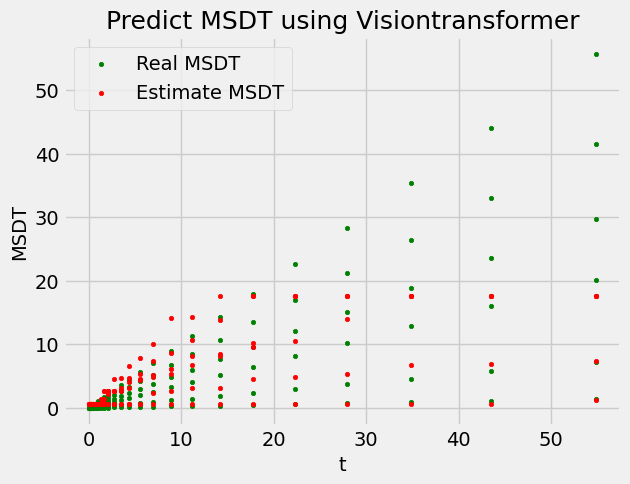

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

y_testGLY = df_all_GLY['MSDT'].tolist()
pred_listGLY = df_all_GLY['pre_MSDT'].tolist()
list_t = df_all_GLY['t'].tolist()
print(len(y_testGLY))
print(len(pred_listGLY))
# The mean squared error
print("========== Predict MSDT จาก Glycerol จากทุกความเข้มข้น ==========")
print("Root Mean squared error: %.4f" % mean_squared_error(y_testGLY, pred_listGLY, squared=False))
print("Mean squared error: %.4f" % mean_squared_error(y_testGLY, pred_listGLY))
print("Mean absolute error: %.4f" % mean_absolute_error(y_testGLY, pred_listGLY))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_testGLY, pred_listGLY))
print("-"*80)

## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(list_t, y_testGLY,
            color = "green", s = 10, label = 'Real MSDT')
## plotting residual errors in test data
plt.scatter(list_t, pred_listGLY,
            color = "red", s = 10, label = 'Estimate MSDT')
## plotting line for zero residual error
#plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
## plotting legend
plt.legend(loc = 'upper left')
## plot title
plt.title("Predict MSDT using Visiontransformer", size=18)
plt.xlabel("t", size=14)
plt.ylabel("MSDT", size=14)
## method call for showing the plot
plt.show()

# 💾📂 Test Set

In [21]:
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

df_rand_ = []
## Set solution
GLY = [10, 20, 30, 40, 60, 80]
for G in GLY:
    _G = f"GLY{G}"
    df_idt = pd.read_csv(f'/home/kannika/CSV/MSDT_G{G}.csv')
    list_t = df_idt['t'].tolist()
    print(df_idt.shape)
    _GLY = dataframe[dataframe['GLY']==_G]
    setFolder = list(set(_GLY['folderName']))
    for F in setFolder:
        df_rand = _GLY[_GLY['folderName']==F].reset_index(drop=True)
        print(df_rand.shape)
        df_rand = df_rand.sort_values(by=['idt'])
        df_rand['t'] = list_t
        df_rand_.append(df_rand)

(29, 3)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 3)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 3)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 3)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 3)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 3)
(29, 10)
(29, 10)
(29, 10)
(29, 10)
(29, 10)


In [22]:
print(len(df_rand_))

df_all_GLY = pd.concat(df_rand_, ignore_index=True)
print(df_all_GLY.shape)
df_all_GLY.head()

30
(870, 11)


,Unnamed: 0.1,Unnamed: 0,GLY,folderName,fileName,pathimg,idt,MSDT,subset,pre_MSDT,t
0,112,112,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,1,0.05,test,0.617671,0.052498
1,99,99,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,2,0.09,test,0.617671,0.091199
2,91,91,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,3,0.14,test,0.617671,0.140551
3,95,95,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,5,0.19,test,0.617671,0.190043
4,111,111,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_193350...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,6,0.22,test,0.617671,0.220627


870
870
========== Predict MSDT จาก Glycerol จากทุกความเข้มข้น ==========
Root Mean squared error: 4.8067
Mean squared error: 23.1044
Mean absolute error: 1.8735
Coefficient of determination: 0.7042
--------------------------------------------------------------------------------


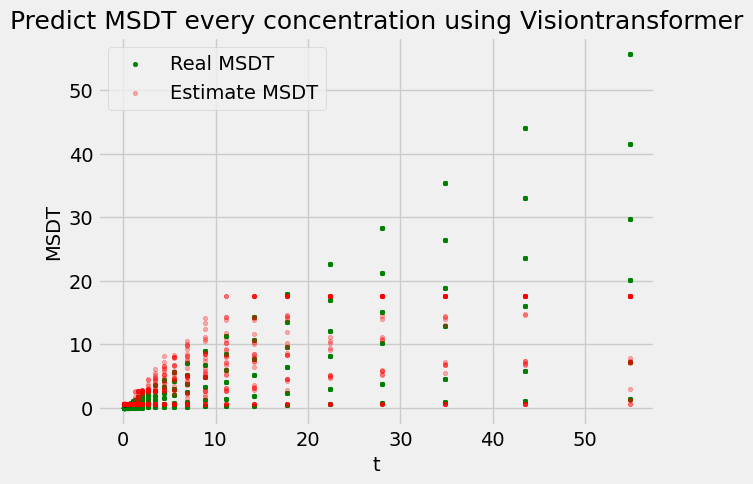

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

y_testGLY = df_all_GLY['MSDT'].tolist()
pred_listGLY =df_all_GLY['pre_MSDT'].tolist()
list_t = df_all_GLY['t'].tolist()
print(len(y_testGLY))
print(len(pred_listGLY))
# The mean squared error
print("========== Predict MSDT จาก Glycerol จากทุกความเข้มข้น ==========")
print("Root Mean squared error: %.4f" % mean_squared_error(y_testGLY, pred_listGLY, squared=False))
print("Mean squared error: %.4f" % mean_squared_error(y_testGLY, pred_listGLY))
print("Mean absolute error: %.4f" % mean_absolute_error(y_testGLY, pred_listGLY))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_testGLY, pred_listGLY))
print("-"*80)

## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(list_t, y_testGLY,
            color = "green", s = 10, label = 'Real MSDT')
## plotting residual errors in test data
plt.scatter(list_t, pred_listGLY,
            color = "red", s = 10, alpha = 0.3, label = 'Estimate MSDT')
## plotting line for zero residual error
#plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
## plotting legend
plt.legend(loc = 'upper left')
## plot title
plt.title("Predict MSDT every concentration using Visiontransformer", size=18)
plt.xlabel("t", size=14)
plt.ylabel("MSDT", size=14)
## method call for showing the plot
plt.show()